In [2]:
%matplotlib inline

In [3]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Read and import data science job listings dataset
data_science_jobs_df = pd.read_csv("resources/data_cleaned_2021.csv")
data_science_jobs_df

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,...,0,0,0,0,0,0,0,other scientist,sr,M
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,...,0,1,0,0,0,0,0,data engineer,sr,na
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,...,0,0,0,0,0,0,0,other scientist,na,P
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,...,0,0,0,0,0,0,0,data scientist,na,na


In [5]:
# For purposes of data analysis, only going to keep relevant columns
data_analysis_df = data_science_jobs_df.drop(columns = ['Company Name','Salary Estimate','Job Description','Headquarters','Location','Revenue','Competitors',
                                                         'company_txt','spark','aws',
                                                         'sql','sas','keras','pytorch','scikit',
                                                         'tensor','hadoop','tableau','bi','flink',
                                                         'mongo','google_an','job_title_sim'])
# Dropped all 'sr' positions in the 'seniority_by_title' column
data_analysis_df.drop(data_analysis_df[data_analysis_df['seniority_by_title']=='sr'].index,inplace = True)

# Dropped all positions that require a master's degree 'M' and PHD degree 'P' in the 'Degree' column
data_analysis_df.drop(data_analysis_df[data_analysis_df['Degree']=='M'].index,inplace = True)
data_analysis_df.drop(data_analysis_df[data_analysis_df['Degree']=='P'].index,inplace = True)

# Dropped row with an unknown company size
data_analysis_df.drop(data_analysis_df[data_analysis_df['Size']=='unknown'].index,inplace = True)

In [6]:
# Picking out unwanted job titles from the remaining list of jobs, picking them based on not
# sounding entry level and any non-relevant

unwanted_job_titles = ['College Hire - Data Scientist - Open to December 2019 Graduates',
                       'Data Analytics Manager','MongoDB Data Engineer II','VP, Data Science',
                      'Staff Machine Learning Engineer','Staff Scientist',
                       'Director - Data, Privacy and AI Governance',
                      'Associate Data Analyst- Graduate Development Program','IT - Data Engineer II',
                      'Staff Scientist- Upstream PD','Director Data Science',
                       'Associate Machine Learning Engineer / Data Scientist May 2020 Undergrad',
                      'Data Science Manager','Data Analyst 2 (Missionary Department)','Manager of Data Science',
                      'Quality Control Scientist III- Analytical Development',
                       'Software Engineer Staff Scientist: Human Language Technologies',
                      'Data Scientist / Machine Learning Expert','Data Management Specialist','Project Scientist',
                      'Business Data Analyst, SQL','Systems Engineer II - Data Analyst',
                      'Manager, Safety Scientist, Medical Safety & Risk Management','Revenue Analytics Manager',
                      'Associate Data Analyst','Associate Scientist, LC/MS Biologics',
                      'Corporate Risk Data Analyst (SQL Based) - Milwaukee or',
                      'Marketing Data Analyst, May 2020 Undergrad','IT Associate Data Analyst',
                      ]


# Dropping all the rows with positions in the unwanted_job_titles
for unwanted in unwanted_job_titles:
    data_analysis_df.drop(data_analysis_df[data_analysis_df['Job Title'] == unwanted].index,inplace = True)

data_analysis_df

# Made list of all jobs to easily pick out which ones we shouldn't include
# counter = 0
# for job in data_analysis_df['Job Title'].unique():
#     counter += 1
#     print("{}.{}".format(counter,job))

,index,Job Title,Rating,Size,Founded,Type of ownership,Industry,Sector,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Job Location,Age,Python,excel,seniority_by_title,Degree
3,3,Data Scientist,3.8,1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",0,0,56,97,76.5,WA,56,1,0,na,na
4,4,Data Scientist,2.9,51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,0,0,86,143,114.5,NY,23,1,1,na,na
5,5,Data Scientist,3.4,201 - 500,2000,Company - Public,Real Estate,Real Estate,0,0,71,119,95.0,TX,21,1,1,na,na
6,6,Data Scientist,4.1,501 - 1000,2008,Company - Private,Banks & Credit Unions,Finance,0,0,54,93,73.5,MD,13,0,1,na,na
9,9,Data Scientist,4.6,51 - 200,2009,Company - Private,Internet,Information Technology,0,0,120,160,140.0,NY,12,1,0,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,919,MED TECH/LAB SCIENTIST- SOUTH COASTAL LAB,3.6,1001 - 5000,1935,Nonprofit Organization,Health Care Services & Hospitals,Health Care,1,0,43,70,56.5,DE,86,0,0,na,na
714,924,Data Scientist,3.2,1 - 50,-1,Company - Private,Staffing & Outsourcing,Business Services,0,0,96,161,128.5,PA,-1,1,0,na,na
715,926,Scientist - Analytical Services,3.1,5001 - 10000,1875,Company - Private,Consumer Products Manufacturing,Manufacturing,0,0,65,134,99.5,NC,146,0,1,na,na
724,936,ENVIRONMENTAL ENGINEER/SCIENTIST,3.3,1 - 50,1976,Company - Private,Construction,"Construction, Repair & Maintenance",1,1,52,58,55.0,MA,45,0,1,na,na


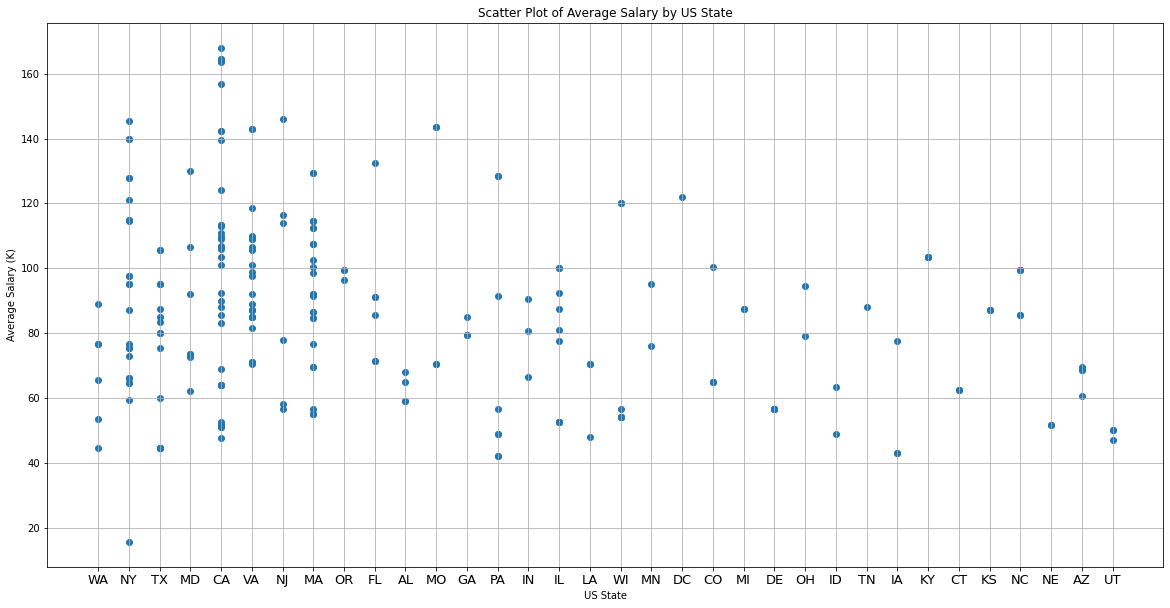

In [7]:
# Making a scatter plot of job location vs average salary
loc_avg_sal_df = data_analysis_df[['Job Location','Avg Salary(K)']]
plt.figure(figsize=(20,10))
plt.scatter(data_analysis_df['Job Location'],data_analysis_df['Avg Salary(K)'])
plt.xlabel("US State")
plt.tick_params(axis='x', which='major', labelsize=13)
plt.ylabel("Average Salary (K)")
plt.title("Scatter Plot of Average Salary by US State")
plt.grid()
plt.show()

In [8]:
#Find the state with the most amount of data entries 
#This could indicate that there are more job opportunities here
location= data_analysis_df.groupby('Job Location')
location["Job Location"].count().sort_values(ascending = False)

Job Location
CA    37
MA    26
VA    24
NY    24
TX    15
IL    10
PA     8
MD     7
WI     7
WA     6
DE     6
NJ     6
FL     6
NC     5
AZ     4
CO     4
MO     4
AL     4
KY     4
LA     3
KS     3
OR     3
CT     3
UT     3
IN     3
GA     3
IA     3
MI     2
MN     2
ID     2
NE     2
OH     2
DC     1
TN     1
Name: Job Location, dtype: int64

In [9]:
#Find the top 10 highest paying jobs 
#We can see that 50% of the top 10 highest paying jobs are in CA. 
#Additionally, 60% are in the IT sector and almost all titles are Data Scientist
data_analysis_df.sort_values(by=["Avg Salary(K)"], ascending=False).head(10)

,index,Job Title,Rating,Size,Founded,Type of ownership,Industry,Sector,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Job Location,Age,Python,excel,seniority_by_title,Degree
549,701,Data Scientist - Sales,4.7,501 - 1000,2014,Company - Private,Computer Hardware & Software,Information Technology,0,0,130,206,168.0,CA,7,1,1,na,na
314,396,Data Scientist,3.3,201 - 500,2008,Company - Private,Advertising & Marketing,Business Services,0,0,127,202,164.5,CA,13,0,0,na,na
440,562,Data Scientist,3.3,201 - 500,2008,Company - Private,Advertising & Marketing,Business Services,0,0,127,202,164.5,CA,13,0,0,na,na
10,10,Data Scientist,3.5,501 - 1000,2011,Company - Private,Other Retail Stores,Retail,0,0,126,201,163.5,CA,10,1,0,na,na
109,124,Data Scientist,4.5,201 - 500,2006,Company - Private,Computer Hardware & Software,Information Technology,0,0,121,193,157.0,CA,15,0,0,na,na
15,15,Data Engineer I,3.6,1001 - 5000,1995,Subsidiary or Business Segment,Motion Picture Production & Distribution,Media,0,0,102,190,146.0,NJ,26,0,1,na,na
459,587,Data Scientist,4.8,1 - 50,2011,Company - Private,IT Services,Information Technology,0,0,112,179,145.5,NY,10,1,1,na,na
57,61,Data Scientist,4.7,51 - 200,2016,Company - Private,IT Services,Information Technology,0,0,111,176,143.5,MO,5,1,0,na,na
423,541,Data Scientist,4.7,51 - 200,2016,Company - Private,IT Services,Information Technology,0,0,111,176,143.5,MO,5,1,0,na,na
24,25,Data Scientist,4.0,501 - 1000,2012,Company - Private,Enterprise Software & Network Solutions,Information Technology,0,0,109,177,143.0,VA,9,1,0,na,na


In [10]:
#Find the median salaries for top 5 states
#We are only using these states because they have the most data to analyze. 
#States with less than 15 data entries may not be a good representation of the average salaries for that state.
state = ["CA","MA","VA","NY","TX"]
avg_sal = []
for x in state:
    sepstate = data_analysis_df.loc[data_analysis_df["Job Location"]==x]["Avg Salary(K)"]
    avg_sal.append(sepstate)

Text(0.5, 1.0, 'Avg Salary(K) for Top 5 States')

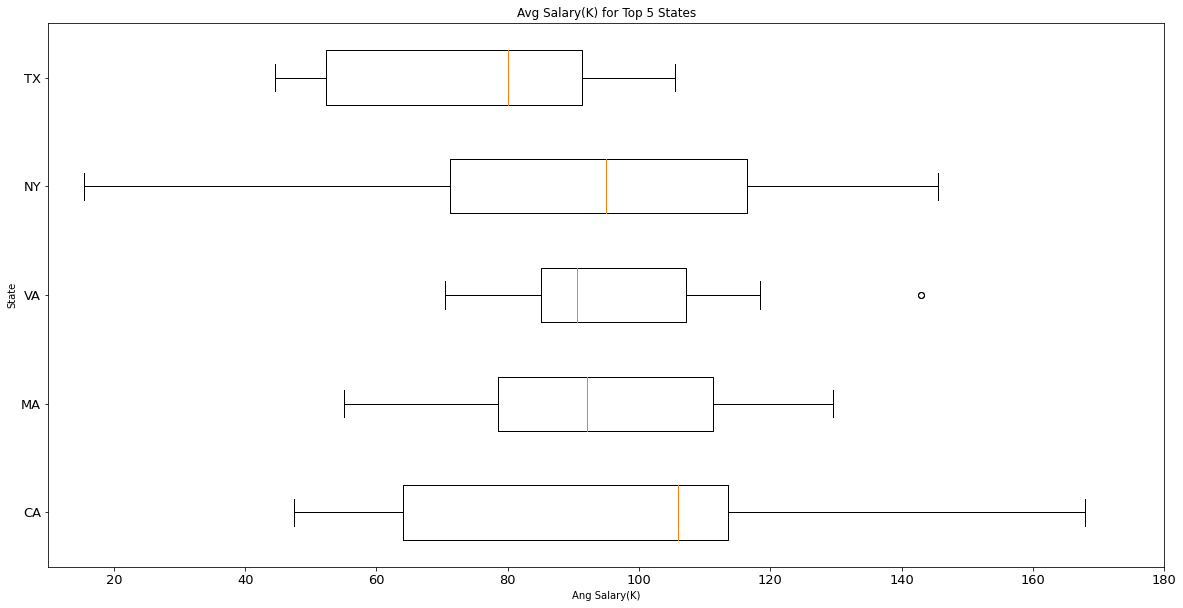

In [30]:
plt.figure(figsize=(20,10))
plt.boxplot(avg_sal, vert=False, flierprops={"marker":"o"})
plt.yticks(range(1,6),state)
plt.xlim(10,180)
plt.tick_params(which='major', labelsize=13)
plt.xlabel("Ang Salary(K)")
plt.ylabel("State")
plt.title("Avg Salary(K) for Top 5 States")

Text(0.5, 1.0, 'Avg Salary(K) for United States')

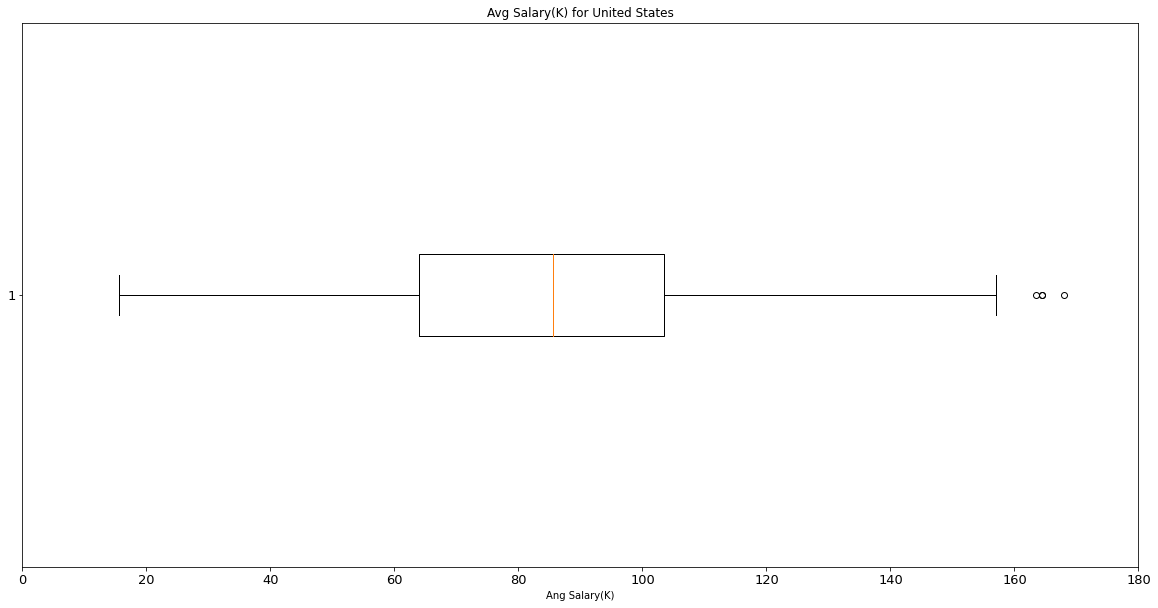

In [31]:
#Find the boxplot of all data given. This represents the median salary for the US. 
#We will use this to compare to other states to see if working in a specific state will affect the salary. 
plt.figure(figsize=(20,10))
plt.boxplot(data_analysis_df["Avg Salary(K)"], vert=False)
plt.xlim(0,180)
plt.tick_params(which='major', labelsize=13)
plt.xlabel("Ang Salary(K)")
plt.title("Avg Salary(K) for United States")

In [ ]:
#Conclusion: CA, MA, VA and NY have medians that are greater than the US average. 